In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

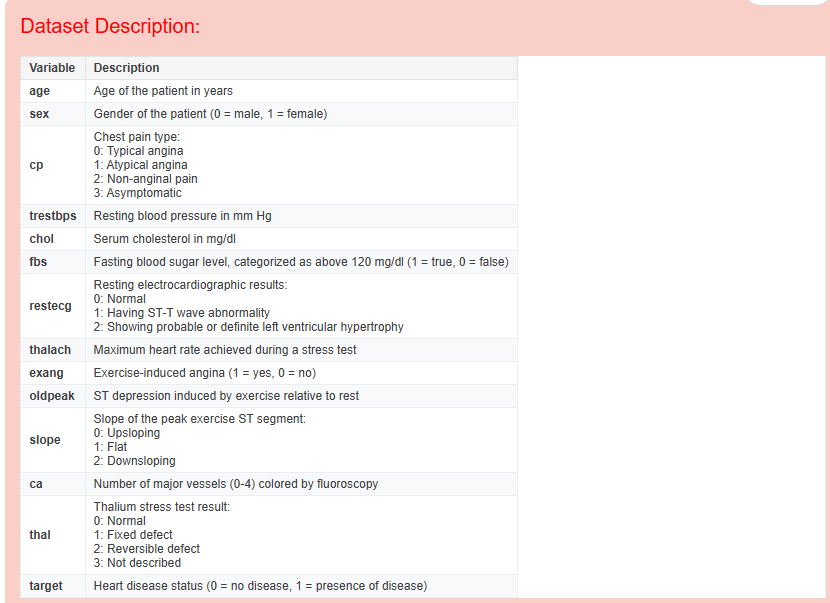

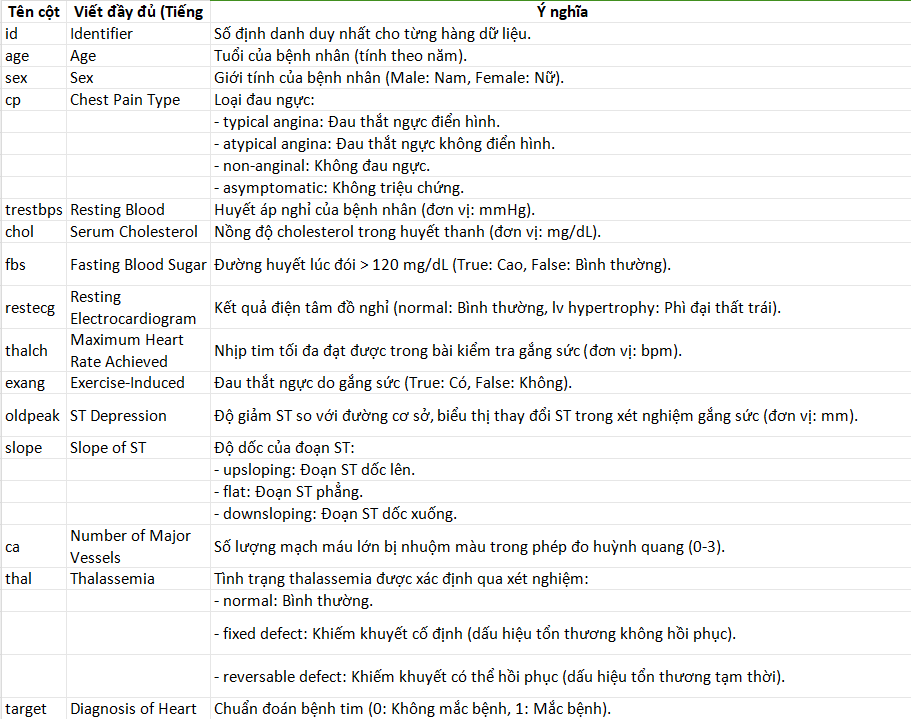

### Mô tả dữ liệu

In [2]:
df_heart = pd.read_csv('heart_disease_test.csv')
df_heart = df_heart.drop(columns='id')
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
0,38,Female,non-anginal,90.7,292.0,False,lv hypertrophy,142.3,False,5.9,flat,2,reversable defect,1
1,57,Male,non-anginal,195.5,262.4,True,normal,183.6,True,2.1,upsloping,3,fixed defect,1
2,53,Male,non-anginal,150.4,335.6,False,lv hypertrophy,187.0,False,3.9,flat,0,normal,0
3,32,Female,non-anginal,132.5,334.5,True,lv hypertrophy,82.7,False,0.5,upsloping,0,fixed defect,1
4,74,Male,non-anginal,165.3,169.8,False,normal,168.1,True,0.9,upsloping,0,reversable defect,1


In [3]:
df_heart.select_dtypes(include=('int64', 'float64')).head()

,age,trestbps,chol,thalch,oldpeak,ca,target
0,38,90.7,292.0,142.3,5.9,2,1
1,57,195.5,262.4,183.6,2.1,3,1
2,53,150.4,335.6,187.0,3.9,0,0
3,32,132.5,334.5,82.7,0.5,0,1
4,74,165.3,169.8,168.1,0.9,0,1


In [4]:
df_heart.select_dtypes(include=('object')).head()

,sex,cp,restecg,slope,thal
0,Female,non-anginal,lv hypertrophy,flat,reversable defect
1,Male,non-anginal,normal,upsloping,fixed defect
2,Male,non-anginal,lv hypertrophy,flat,normal
3,Female,non-anginal,lv hypertrophy,upsloping,fixed defect
4,Male,non-anginal,normal,upsloping,reversable defect


In [5]:
df_heart.describe()

,age,trestbps,chol,thalch,oldpeak,ca,target
count,20.000000,20.00000,20.000000,20.000000,20.00000,20.000000,20.000000
mean,54.400000,152.38500,227.375000,137.575000,2.92000,1.000000,0.550000
std,14.669697,35.28125,84.288351,40.312188,2.10778,1.256562,0.510418
min,30.000000,90.70000,123.300000,74.700000,0.30000,0.000000,0.000000
25%,42.500000,129.77500,157.900000,107.650000,1.12500,0.000000,0.000000
50%,57.000000,157.85000,204.900000,140.300000,2.25000,0.000000,1.000000
75%,64.750000,180.72500,295.400000,174.525000,4.90000,2.000000,1.000000
max,75.000000,197.50000,388.400000,187.000000,6.00000,3.000000,1.000000


In [6]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       20 non-null     int64  
 1   sex       20 non-null     object 
 2   cp        20 non-null     object 
 3   trestbps  20 non-null     float64
 4   chol      20 non-null     float64
 5   fbs       20 non-null     bool   
 6   restecg   20 non-null     object 
 7   thalch    20 non-null     float64
 8   exang     20 non-null     bool   
 9   oldpeak   20 non-null     float64
 10  slope     20 non-null     object 
 11  ca        20 non-null     int64  
 12  thal      20 non-null     object 
 13  target    20 non-null     int64  
dtypes: bool(2), float64(4), int64(3), object(5)
memory usage: 2.0+ KB


### Tách các đặc trưng số và mục lục(Categories)

In [7]:
numeric_col = ['age', 'trestbps', 'chol', 'thalch',	'oldpeak',	'ca', 'target']
numeric_col


['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'target']

In [8]:
categories_col = [column for column in df_heart.columns if column not in numeric_col]
categories_col

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

## Mức độ dễ (3 câu hỏi)


### Câu hỏi 1: Bao nhiêu phần trăm bệnh nhân trong dữ liệu được chẩn đoán mắc bệnh tim (target = 1)?
- Mục đích: Hiểu tỷ lệ mắc bệnh tim trong tập dữ liệu.

In [9]:
# Phan tram benh nhan mac benh
mac_benh =(len(df_heart[df_heart['target']==1])/len(df_heart[numeric_col]))*100
print(f'Ti le mac benh la {mac_benh:.2f}%')

Ti le mac benh la 55.00%


### Câu hỏi 2: Tỷ lệ giữa nam (Male) và nữ (Female) trong dữ liệu là bao nhiêu?
- Mục đích: Phân bố giới tính của bệnh nhân trong tập dữ liệu.

In [10]:
df_heart['sex'].value_counts()

sex
Female    11
Male       9
Name: count, dtype: int64

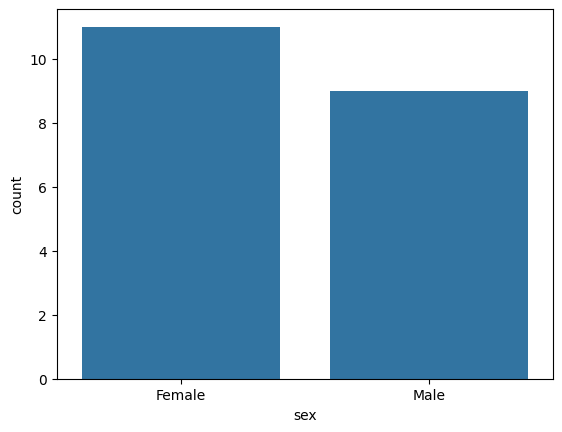

In [11]:
# Ty le nam nu
sns.barplot(data=df_heart['sex'].value_counts());

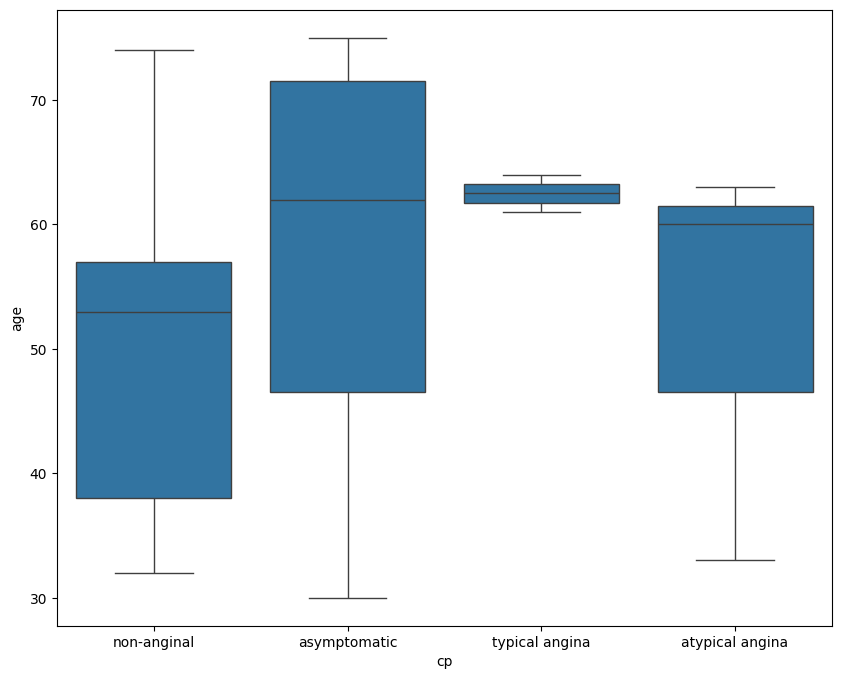

In [12]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df_heart, x='cp', y='age');

### Câu hỏi 3: Độ tuổi trung bình của bệnh nhân trong dữ liệu là bao nhiêu?
- Mục đích: Hiểu nhóm tuổi phổ biến trong tập dữ liệu.

In [13]:
print(f'Do tuoi TB cua benh nhan:', df_heart['age'].mean())

Do tuoi TB cua benh nhan: 54.4


## Mức độ trung bình (4 câu hỏi)


### Câu hỏi 4: Có sự khác biệt nào về tỷ lệ mắc bệnh tim (target) giữa nam và nữ không?
- Mục đích: Tìm hiểu sự liên quan giữa giới tính và khả năng mắc bệnh tim.

In [14]:
# Tính tỷ lệ mắc bệnh tim theo giới tính
gender_target = df_heart.groupby('sex')['target'].value_counts()
print(gender_target)

sex     target
Female  1         6
        0         5
Male    1         5
        0         4
Name: count, dtype: int64


In [15]:
male = df_heart[df_heart['sex']=='Male']
male_target = df_heart[(df_heart['sex']=='Male')&(df_heart['target']==1)]
male_percent = len(male_target)/len(male)*100
print(f'Phan tram mac benh o nam la: {male_percent:.2f}%')


female = df_heart[df_heart['sex']=='Female']
female_target = df_heart[(df_heart['sex']=='Female')&(df_heart['target']==1)]
female_percent = len(female_target)/len(female)*100
print(f'Phan tram mac benh o nam la: {female_percent:.2f}%')

Phan tram mac benh o nam la: 55.56%
Phan tram mac benh o nam la: 54.55%


### Câu hỏi 5: Nhóm đau ngực nào (cp) phổ biến nhất ở những bệnh nhân không mắc bệnh tim (target = 0)?
- Mục đích: Phân tích kiểu đau ngực ở nhóm không mắc bệnh.

In [16]:
cp_target_0=df_heart['cp'][df_heart['target']==0].value_counts()
cp_target_0

cp
non-anginal        4
asymptomatic       3
atypical angina    2
Name: count, dtype: int64

In [17]:
df_cp_target_0 = cp_target_0.reset_index()
# Đổi tên các cột cho dễ hiểu
df_cp_target_0.columns = ['cp', 'values']
df_cp_target_0.head()

,cp,values
0,non-anginal,4
1,asymptomatic,3
2,atypical angina,2


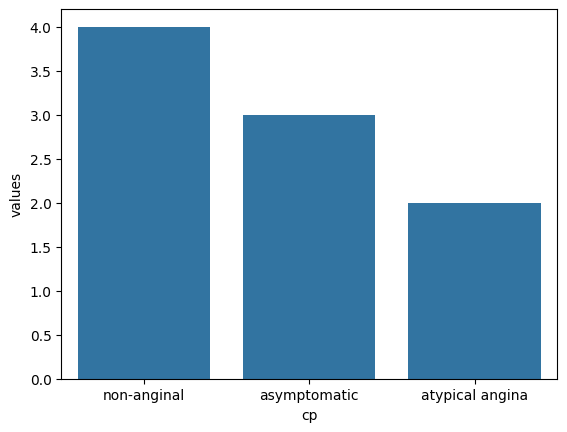

In [18]:
sns.barplot(df_cp_target_0, x='cp', y='values');

### Câu hỏi 6: Huyết áp nghỉ (trestbps) trung bình của bệnh nhân mắc bệnh tim so với bệnh nhân không mắc bệnh có khác biệt không?
- Mục đích: Xem xét mối liên hệ giữa huyết áp và bệnh tim.

In [19]:
trestbps_target_1 = df_heart[['trestbps']][df_heart['target']==1].mean()
trestbps_target_2 = df_heart[['trestbps']][df_heart['target']==0].mean()
print(f'''Huyet ap luc nghi cua nguoi mac benh {trestbps_target_1}\n
Huyet ap luc nghi cua nguoi ko mac benh {trestbps_target_2}''')

Huyet ap luc nghi cua nguoi mac benh trestbps    149.845455
dtype: float64

Huyet ap luc nghi cua nguoi ko mac benh trestbps    155.488889
dtype: float64


In [20]:
trestbps_target_1 = df_heart[['trestbps']][df_heart['target']==1].mean()
df_trestbps_target_1 = trestbps_target_1.reset_index()
df_trestbps_target_1.columns=['index', 'values']
df_trestbps_target_1

,index,values
0,trestbps,149.845455


In [21]:
trestbps_target_2 = df_heart[['trestbps']][df_heart['target']==0].mean()
df_trestbps_target_2 = trestbps_target_2.reset_index()
df_trestbps_target_2.columns=['index', 'values']
df_trestbps_target_2

,index,values
0,trestbps,155.488889


In [22]:
df_merge_trestpbs = pd.merge(df_trestbps_target_1, df_trestbps_target_2, how='inner', on=['index'])
df_merge_trestpbs

,index,values_x,values_y
0,trestbps,149.845455,155.488889


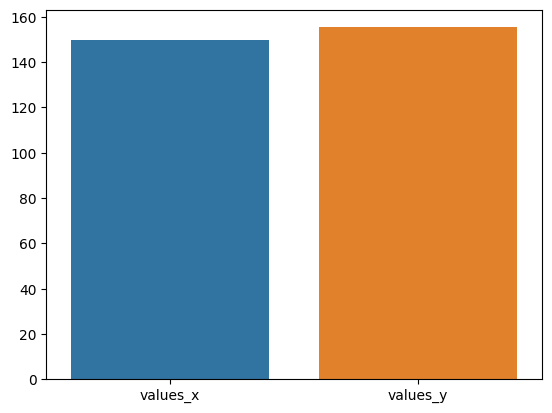

In [23]:
sns.barplot(data=df_merge_trestpbs);

### Câu hỏi 7: Nhóm bệnh nhân có giá trị cholesterol (chol) trung bình cao hơn hay thấp hơn những người không mắc bệnh tim?
- Mục đích: Đánh giá mối quan hệ giữa nồng độ cholesterol và bệnh tim.

In [24]:
chol_targer_1 = df_heart['chol'][df_heart['target']==1].mean()
chol_target_0 = df_heart['chol'][df_heart['target']==0].mean()
print(chol_target_0, chol_targer_1)

222.91111111111113 231.02727272727273


In [25]:
df_chol_target_1 = df_heart[df_heart['target']==1]
df_chol_target_1.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
count,11.000000,11,11,11.000000,11.000000,11,11,11.000000,11,11.000000,11,11.000000,11,11.0
unique,NaN,2,4,NaN,NaN,2,2,NaN,2,NaN,3,NaN,3,NaN
top,NaN,Female,non-anginal,NaN,NaN,False,lv hypertrophy,NaN,True,NaN,upsloping,NaN,reversable defect,NaN
freq,NaN,6,5,NaN,NaN,7,8,NaN,6,NaN,6,NaN,4,NaN
mean,51.454545,NaN,NaN,149.845455,231.027273,NaN,NaN,132.072727,NaN,2.963636,NaN,1.727273,NaN,1.0
std,15.870499,NaN,NaN,35.511755,83.279146,NaN,NaN,42.383513,NaN,2.015080,NaN,1.272078,NaN,0.0
min,30.000000,NaN,NaN,90.700000,129.100000,NaN,NaN,74.700000,NaN,0.500000,NaN,0.000000,NaN,1.0
25%,37.000000,NaN,NaN,127.050000,175.050000,NaN,NaN,92.700000,NaN,1.350000,NaN,0.500000,NaN,1.0
50%,57.000000,NaN,NaN,147.700000,213.700000,NaN,NaN,138.300000,NaN,2.400000,NaN,2.000000,NaN,1.0
75%,62.500000,NaN,NaN,181.150000,277.200000,NaN,NaN,170.850000,NaN,4.700000,NaN,3.000000,NaN,1.0


In [26]:
df_chol_target_0 = df_heart[df_heart['target']==0]
df_chol_target_0.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
count,9.000000,9,9,9.000000,9.000000,9,9,9.000000,9,9.000000,9,9.000000,9,9.0
unique,NaN,2,3,NaN,NaN,2,2,NaN,2,NaN,3,NaN,3,NaN
top,NaN,Female,non-anginal,NaN,NaN,True,lv hypertrophy,NaN,False,NaN,flat,NaN,normal,NaN
freq,NaN,5,4,NaN,NaN,6,5,NaN,7,NaN,5,NaN,3,NaN
mean,58.000000,NaN,NaN,155.488889,222.911111,NaN,NaN,144.300000,NaN,2.866667,NaN,0.111111,NaN,0.0
std,13.028814,NaN,NaN,36.881684,90.350546,NaN,NaN,39.007531,NaN,2.338803,NaN,0.333333,NaN,0.0
min,33.000000,NaN,NaN,94.200000,123.300000,NaN,NaN,81.500000,NaN,0.300000,NaN,0.000000,NaN,0.0
25%,53.000000,NaN,NaN,147.500000,143.800000,NaN,NaN,109.900000,NaN,1.200000,NaN,0.000000,NaN,0.0
50%,57.000000,NaN,NaN,172.800000,196.100000,NaN,NaN,163.100000,NaN,1.500000,NaN,0.000000,NaN,0.0
75%,67.000000,NaN,NaN,177.800000,305.600000,NaN,NaN,177.300000,NaN,5.200000,NaN,0.000000,NaN,0.0


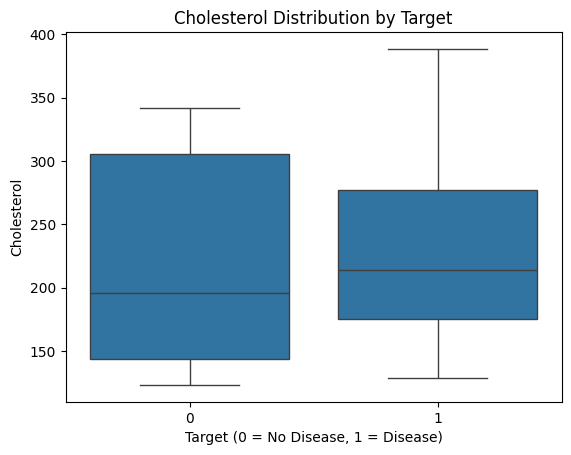

In [27]:
sns.boxplot(data=df_heart, x='target', y='chol')
plt.title('Cholesterol Distribution by Target')
plt.xlabel('Target (0 = No Disease, 1 = Disease)')
plt.ylabel('Cholesterol');

In [28]:
df_chol_target_0[df_chol_target_0[['chol']].isna().any(axis=1)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target


In [29]:
df_chol_target_0 = df_chol_target_0.dropna(subset='chol')
df_chol_target_0

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
2,53,Male,non-anginal,150.4,335.6,False,lv hypertrophy,187.0,False,3.9,flat,0,normal,0
5,75,Female,asymptomatic,175.8,143.8,True,normal,109.9,True,0.3,downsloping,0,reversable defect,0
6,48,Male,non-anginal,98.8,162.6,True,normal,119.9,False,1.3,flat,1,reversable defect,0
9,63,Male,atypical angina,94.2,341.5,True,lv hypertrophy,109.3,True,5.8,upsloping,0,fixed defect,0
11,33,Female,atypical angina,197.5,305.6,True,normal,81.5,False,1.5,flat,0,reversable defect,0
13,57,Male,non-anginal,184.6,123.3,False,lv hypertrophy,179.3,False,5.2,flat,0,normal,0
17,54,Female,asymptomatic,172.8,269.6,True,lv hypertrophy,177.3,False,0.6,flat,0,fixed defect,0
18,72,Female,asymptomatic,147.5,128.1,True,normal,163.1,False,1.2,upsloping,0,fixed defect,0
19,67,Female,non-anginal,177.8,196.1,False,lv hypertrophy,171.4,False,6.0,upsloping,0,normal,0


## Numeric 

#### Kiểm tra các giá trị bằng 0
- Vì 0 đối với các chỉ số trên là 0 hợp lý điều này gây nhiễu cho bộ data trên, nên cần chuyển về Nan

In [30]:
for col in df_heart[['age', 'trestbps', 'chol', 'thalch']]:
    # Đếm số lượng giá trị 0 trước khi thay thế
    zero_count = df_heart[df_heart[col] == 0].shape[0]
    
    # Thay thế giá trị 0 bằng NaN
    df_heart[col] = df_heart[col].replace(0, np.nan)
    
    # In thông tin
    print(f"Column: {col}, Dem_GT_0: {zero_count}")


Column: age, Dem_GT_0: 0
Column: trestbps, Dem_GT_0: 0
Column: chol, Dem_GT_0: 0
Column: thalch, Dem_GT_0: 0


In [31]:
df_numeric = df_heart[numeric_col]
df_numeric

,age,trestbps,chol,thalch,oldpeak,ca,target
0,38,90.7,292.0,142.3,5.9,2,1
1,57,195.5,262.4,183.6,2.1,3,1
2,53,150.4,335.6,187.0,3.9,0,0
3,32,132.5,334.5,82.7,0.5,0,1
4,74,165.3,169.8,168.1,0.9,0,1
5,75,175.8,143.8,109.9,0.3,0,0
6,48,98.8,162.6,119.9,1.3,1,0
7,70,143.5,129.1,138.3,4.8,2,1
8,64,147.7,249.2,74.7,3.3,1,1
9,63,94.2,341.5,109.3,5.8,0,0


#### Numeric columns

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df_heart.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

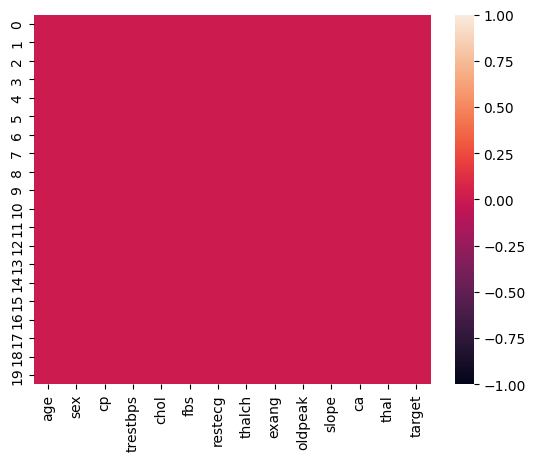

In [34]:
sns.heatmap(df_heart.isna(), vmin=-1, vmax=1);

In [35]:
from sklearn.preprocessing import OrdinalEncoder
import numpy as np

# Áp dụng OrdinalEncoder (giữ nguyên giá trị NaN)
ordinal_encoder = OrdinalEncoder()

# Chỉ encode các cột phân loại
df_heart[categories_col] = ordinal_encoder.fit_transform(df_heart[categories_col])

df_heart.isna().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [36]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       20 non-null     int64  
 1   sex       20 non-null     float64
 2   cp        20 non-null     float64
 3   trestbps  20 non-null     float64
 4   chol      20 non-null     float64
 5   fbs       20 non-null     float64
 6   restecg   20 non-null     float64
 7   thalch    20 non-null     float64
 8   exang     20 non-null     float64
 9   oldpeak   20 non-null     float64
 10  slope     20 non-null     float64
 11  ca        20 non-null     int64  
 12  thal      20 non-null     float64
 13  target    20 non-null     int64  
dtypes: float64(11), int64(3)
memory usage: 2.3 KB


In [37]:
corr = df_heart[['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'target']].corr()
corr

,age,trestbps,chol,thalch,oldpeak,ca,target
age,1.000000,0.014096,-0.549712,0.256453,-0.127253,-0.254116,-0.227743
trestbps,0.014096,1.000000,-0.117419,0.180313,-0.023571,0.033122,-0.081644
chol,-0.549712,-0.117419,1.000000,-0.036122,0.221169,0.018039,0.049148
thalch,0.256453,0.180313,-0.036122,1.000000,0.165366,-0.131852,-0.154817
oldpeak,-0.127253,-0.023571,0.221169,0.165366,1.000000,0.226539,0.023482
ca,-0.254116,0.033122,0.018039,-0.131852,0.226539,1.000000,0.656488
target,-0.227743,-0.081644,0.049148,-0.154817,0.023482,0.656488,1.000000


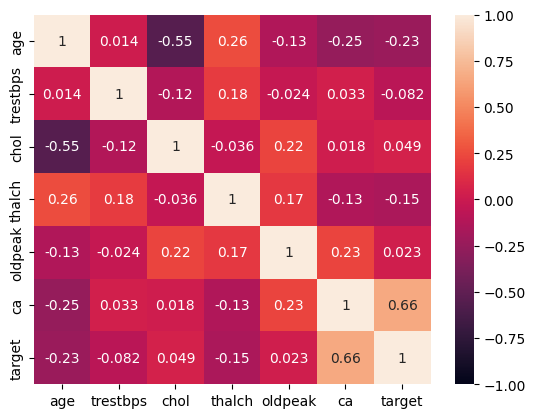

In [38]:
sns.heatmap(data=corr, annot=True,
            vmin=-1, vmax=1);

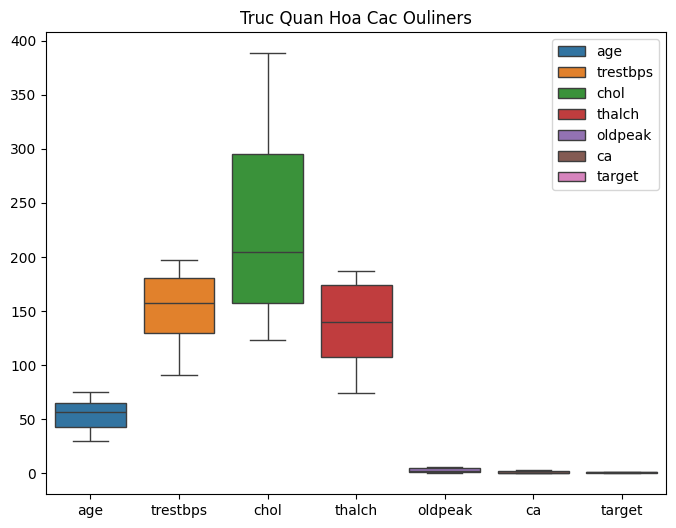

In [39]:
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(df_heart[['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'target']], legend=True);
ax.set(title="Truc Quan Hoa Cac Ouliners");
# ax.get_xticklabels('')

In [40]:
df_heart[['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'target']].describe()

,age,trestbps,chol,thalch,oldpeak,ca,target
count,20.000000,20.00000,20.000000,20.000000,20.00000,20.000000,20.000000
mean,54.400000,152.38500,227.375000,137.575000,2.92000,1.000000,0.550000
std,14.669697,35.28125,84.288351,40.312188,2.10778,1.256562,0.510418
min,30.000000,90.70000,123.300000,74.700000,0.30000,0.000000,0.000000
25%,42.500000,129.77500,157.900000,107.650000,1.12500,0.000000,0.000000
50%,57.000000,157.85000,204.900000,140.300000,2.25000,0.000000,1.000000
75%,64.750000,180.72500,295.400000,174.525000,4.90000,2.000000,1.000000
max,75.000000,197.50000,388.400000,187.000000,6.00000,3.000000,1.000000


In [41]:
def detect_outliners_without_nan(x):
    # Bỏ qua giá trị NaN khi tính toán
    q1 = np.nanquantile(x, 0.25)
    q3 = np.nanquantile(x, 0.75)
    IQR = q3 - q1
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR
    return x[(x<lower_bound)|(x>upper_bound)]
print(detect_outliners_without_nan(df_heart['chol']))
# print(detect_outliners_without_nan(df_heart['trestbps']).value_counts().sum())
# print(detect_outliners_without_nan(df_heart['thalch']).value_counts().sum())
# print(detect_outliners_without_nan(df_heart['oldpeak']).value_counts().sum())
# print(detect_outliners_without_nan(df_heart['ca']).value_counts().sum())

Series([], Name: chol, dtype: float64)


In [42]:
outliers_dict = {}
for col in df_numeric.columns:
    outliers_dict[col] = detect_outliners_without_nan(df_heart[col]).value_counts().sum()
outliers_dict

{'age': 0,
 'trestbps': 0,
 'chol': 0,
 'thalch': 0,
 'oldpeak': 0,
 'ca': 0,
 'target': 0}

In [43]:
# # loại bỏ outliers
# for col in df_heart[['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'target']]:
#     q1 = df_heart[col].quantile(0.25)
#     q3 = df_heart[col].quantile(0.75)
#     iqr = q3 - q1
#     lower_bound = q1 - 1.5 * iqr
#     upper_bound = q3 + 1.5 * iqr

#     # Lọc dữ liệu trong khoảng hợp lý
#     # kết hợp giữ lại điều kiện nan và khoảng tứ phân vị
#     df_heart = df_heart[(df_heart[col].isna()) | (df_heart[col] >= lower_bound) & (df_heart[col] <= upper_bound)]

# df_heart

In [44]:
# loại bỏ outliers
for col in df_heart[['chol']]:
    q1 = df_heart[col].quantile(0.25)
    q3 = df_heart[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Lọc dữ liệu trong khoảng hợp lý
    # kết hợp giữ lại điều kiện nan và khoảng tứ phân vị
    df_heart = df_heart[(df_heart[col].isna()) | (df_heart[col] >= lower_bound) & (df_heart[col] <= upper_bound)]

df_heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
0,38,0.0,2.0,90.7,292.0,0.0,0.0,142.3,0.0,5.9,1.0,2,2.0,1
1,57,1.0,2.0,195.5,262.4,1.0,1.0,183.6,1.0,2.1,2.0,3,0.0,1
2,53,1.0,2.0,150.4,335.6,0.0,0.0,187.0,0.0,3.9,1.0,0,1.0,0
3,32,0.0,2.0,132.5,334.5,1.0,0.0,82.7,0.0,0.5,2.0,0,0.0,1
4,74,1.0,2.0,165.3,169.8,0.0,1.0,168.1,1.0,0.9,2.0,0,2.0,1
5,75,0.0,0.0,175.8,143.8,1.0,1.0,109.9,1.0,0.3,0.0,0,2.0,0
6,48,1.0,2.0,98.8,162.6,1.0,1.0,119.9,0.0,1.3,1.0,1,2.0,0
7,70,0.0,0.0,143.5,129.1,1.0,1.0,138.3,0.0,4.8,1.0,2,1.0,1
8,64,1.0,3.0,147.7,249.2,1.0,0.0,74.7,1.0,3.3,0.0,1,1.0,1
9,63,1.0,1.0,94.2,341.5,1.0,0.0,109.3,1.0,5.8,2.0,0,0.0,0


#### Xử lý outliners


In [45]:
# def bound(x):
#     # Bỏ qua giá trị NaN khi tính toán
#     q1 = np.nanquantile(x, 0.25)  # Tính Q1, bỏ qua NaN
#     q3 = np.nanquantile(x, 0.75)  # Tính Q3, bỏ qua NaN
#     IQR = q3 - q1
#     lower_bound = q1 - 1.5 * IQR
#     upper_bound = q3 + 1.5 * IQR
#     return [lower_bound, upper_bound]



In [46]:
df_heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
count,20.000000,20.000000,20.00000,20.00000,20.000000,20.000000,20.00000,20.000000,20.000000,20.00000,20.00000,20.000000,20.000000,20.000000
mean,54.400000,0.450000,1.35000,152.38500,227.375000,0.500000,0.35000,137.575000,0.400000,2.92000,1.35000,1.000000,1.050000,0.550000
std,14.669697,0.510418,1.03999,35.28125,84.288351,0.512989,0.48936,40.312188,0.502625,2.10778,0.67082,1.256562,0.825578,0.510418
min,30.000000,0.000000,0.00000,90.70000,123.300000,0.000000,0.00000,74.700000,0.000000,0.30000,0.00000,0.000000,0.000000,0.000000
25%,42.500000,0.000000,0.00000,129.77500,157.900000,0.000000,0.00000,107.650000,0.000000,1.12500,1.00000,0.000000,0.000000,0.000000
50%,57.000000,0.000000,2.00000,157.85000,204.900000,0.500000,0.00000,140.300000,0.000000,2.25000,1.00000,0.000000,1.000000,1.000000
75%,64.750000,1.000000,2.00000,180.72500,295.400000,1.000000,1.00000,174.525000,1.000000,4.90000,2.00000,2.000000,2.000000,1.000000
max,75.000000,1.000000,3.00000,197.50000,388.400000,1.000000,1.00000,187.000000,1.000000,6.00000,2.00000,3.000000,2.000000,1.000000


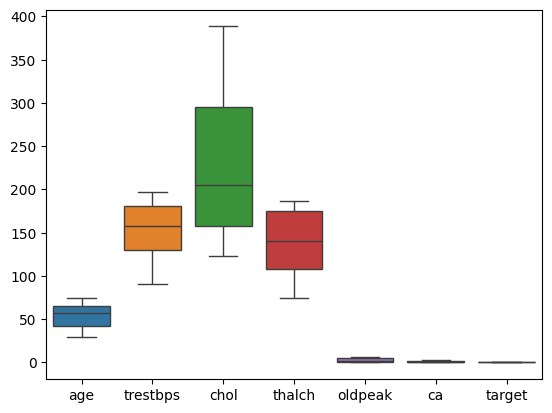

In [47]:
sns.boxplot(data=df_heart[['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'target']]);

In [48]:
# Dung MICE dien Missing Data
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
# Khởi tạo MICE imputer
imputer = IterativeImputer(max_iter=20, random_state=0)
df_heart = imputer.fit_transform(df_heart)
df_heart = pd.DataFrame(df_heart, columns=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                                            'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'])
df_heart.head(50)

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
0,38.0,0.0,2.0,90.7,292.0,0.0,0.0,142.3,0.0,5.9,1.0,2.0,2.0,1.0
1,57.0,1.0,2.0,195.5,262.4,1.0,1.0,183.6,1.0,2.1,2.0,3.0,0.0,1.0
2,53.0,1.0,2.0,150.4,335.6,0.0,0.0,187.0,0.0,3.9,1.0,0.0,1.0,0.0
3,32.0,0.0,2.0,132.5,334.5,1.0,0.0,82.7,0.0,0.5,2.0,0.0,0.0,1.0
4,74.0,1.0,2.0,165.3,169.8,0.0,1.0,168.1,1.0,0.9,2.0,0.0,2.0,1.0
5,75.0,0.0,0.0,175.8,143.8,1.0,1.0,109.9,1.0,0.3,0.0,0.0,2.0,0.0
6,48.0,1.0,2.0,98.8,162.6,1.0,1.0,119.9,0.0,1.3,1.0,1.0,2.0,0.0
7,70.0,0.0,0.0,143.5,129.1,1.0,1.0,138.3,0.0,4.8,1.0,2.0,1.0,1.0
8,64.0,1.0,3.0,147.7,249.2,1.0,0.0,74.7,1.0,3.3,0.0,1.0,1.0,1.0
9,63.0,1.0,1.0,94.2,341.5,1.0,0.0,109.3,1.0,5.8,2.0,0.0,0.0,0.0


In [49]:
df_heart = df_heart.round()
df_heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
0,38.0,0.0,2.0,91.0,292.0,0.0,0.0,142.0,0.0,6.0,1.0,2.0,2.0,1.0
1,57.0,1.0,2.0,196.0,262.0,1.0,1.0,184.0,1.0,2.0,2.0,3.0,0.0,1.0
2,53.0,1.0,2.0,150.0,336.0,0.0,0.0,187.0,0.0,4.0,1.0,0.0,1.0,0.0
3,32.0,0.0,2.0,132.0,334.0,1.0,0.0,83.0,0.0,0.0,2.0,0.0,0.0,1.0
4,74.0,1.0,2.0,165.0,170.0,0.0,1.0,168.0,1.0,1.0,2.0,0.0,2.0,1.0
5,75.0,0.0,0.0,176.0,144.0,1.0,1.0,110.0,1.0,0.0,0.0,0.0,2.0,0.0
6,48.0,1.0,2.0,99.0,163.0,1.0,1.0,120.0,0.0,1.0,1.0,1.0,2.0,0.0
7,70.0,0.0,0.0,144.0,129.0,1.0,1.0,138.0,0.0,5.0,1.0,2.0,1.0,1.0
8,64.0,1.0,3.0,148.0,249.0,1.0,0.0,75.0,1.0,3.0,0.0,1.0,1.0,1.0
9,63.0,1.0,1.0,94.0,342.0,1.0,0.0,109.0,1.0,6.0,2.0,0.0,0.0,0.0


In [50]:
df_heart['ca'] = df_heart['ca'].replace({-0: 0, -1: 0})
df_heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
0,38.0,0.0,2.0,91.0,292.0,0.0,0.0,142.0,0.0,6.0,1.0,2.0,2.0,1.0
1,57.0,1.0,2.0,196.0,262.0,1.0,1.0,184.0,1.0,2.0,2.0,3.0,0.0,1.0
2,53.0,1.0,2.0,150.0,336.0,0.0,0.0,187.0,0.0,4.0,1.0,0.0,1.0,0.0
3,32.0,0.0,2.0,132.0,334.0,1.0,0.0,83.0,0.0,0.0,2.0,0.0,0.0,1.0
4,74.0,1.0,2.0,165.0,170.0,0.0,1.0,168.0,1.0,1.0,2.0,0.0,2.0,1.0
5,75.0,0.0,0.0,176.0,144.0,1.0,1.0,110.0,1.0,0.0,0.0,0.0,2.0,0.0
6,48.0,1.0,2.0,99.0,163.0,1.0,1.0,120.0,0.0,1.0,1.0,1.0,2.0,0.0
7,70.0,0.0,0.0,144.0,129.0,1.0,1.0,138.0,0.0,5.0,1.0,2.0,1.0,1.0
8,64.0,1.0,3.0,148.0,249.0,1.0,0.0,75.0,1.0,3.0,0.0,1.0,1.0,1.0
9,63.0,1.0,1.0,94.0,342.0,1.0,0.0,109.0,1.0,6.0,2.0,0.0,0.0,0.0


In [51]:
df_heart.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

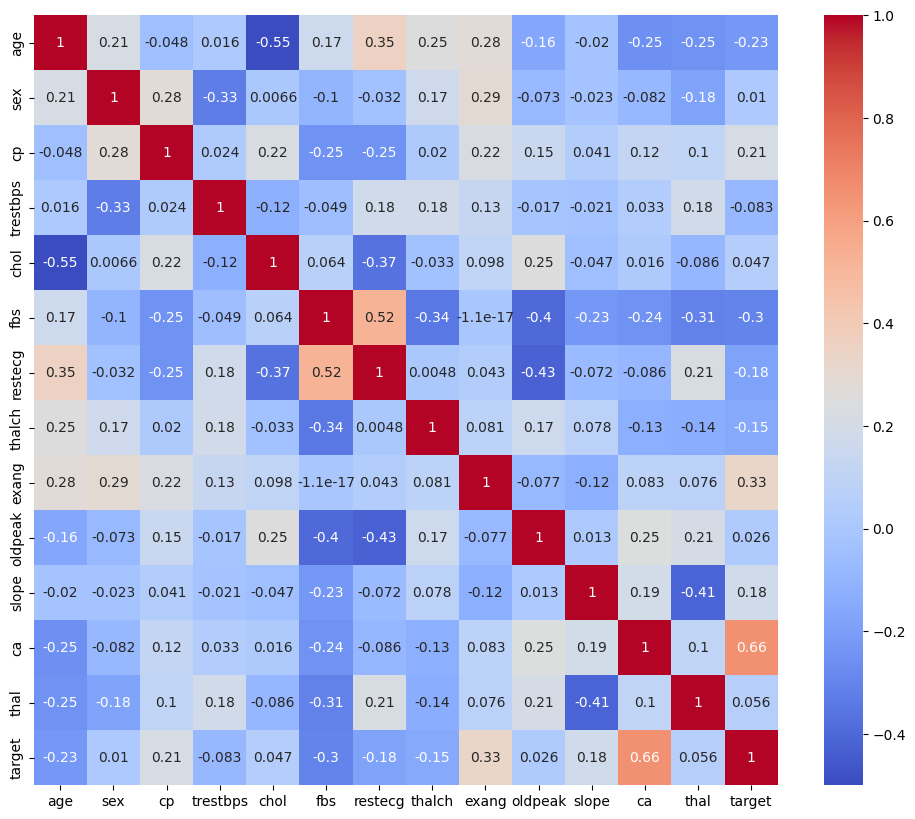

In [52]:
plt.figure(figsize=(12,10))
sns.heatmap(df_heart.corr(), annot=True, 
            vmin=-0.5, vmax=1, cmap='coolwarm');

In [53]:
df_heart[numeric_col].columns

Index(['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'target'], dtype='object')

## Xem Distribution của các đặc trưng

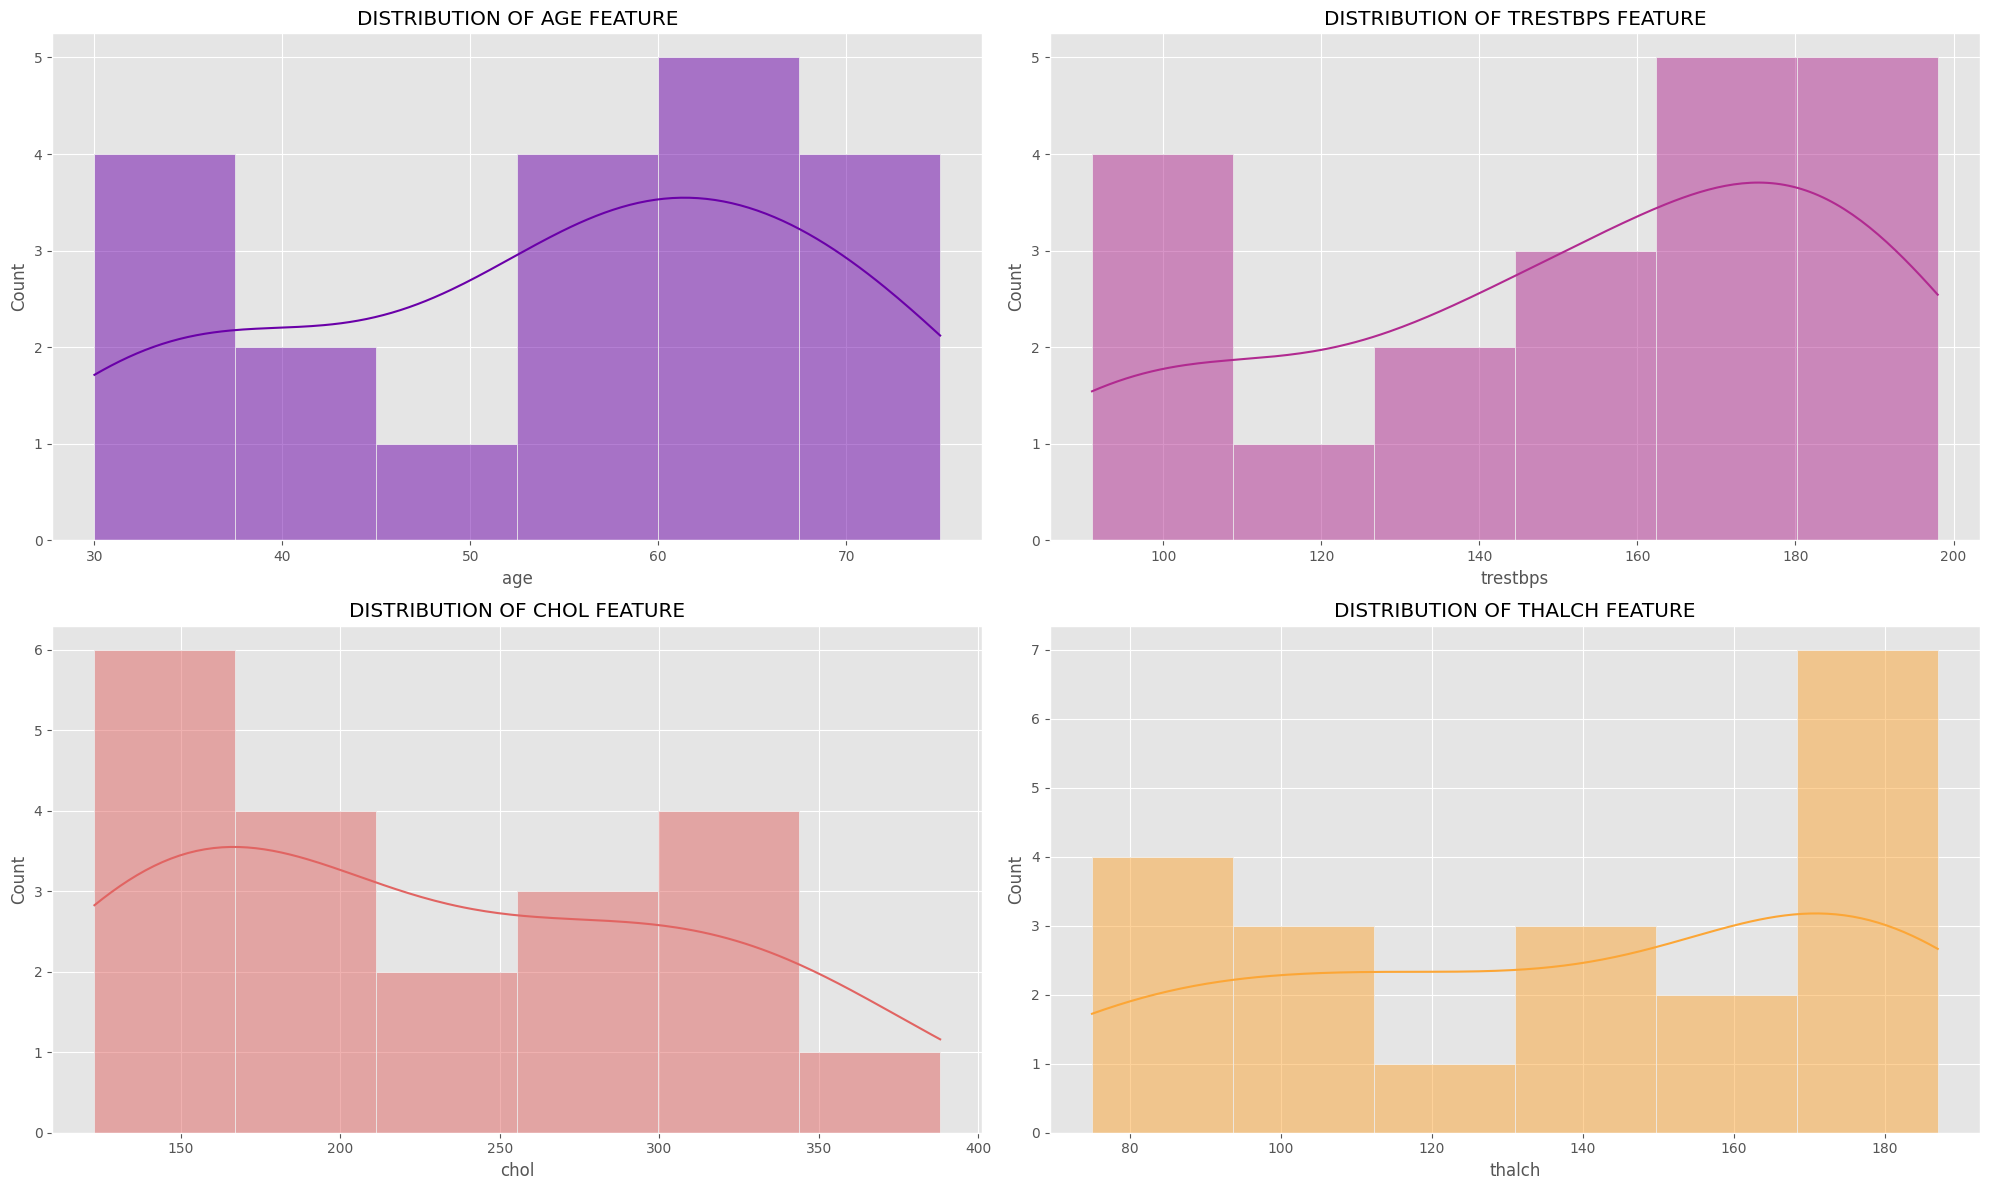

In [54]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(20,12), nrows=2, ncols=2)
ax = ax.flatten()

colors = sns.color_palette("plasma", len(df_heart[['age', 'trestbps', 'chol', 'thalch']].columns))
# colors = ['#FF5733', '#33FF57', '#3357FF', '#FF33A6', '#FFD133', '#A633FF']



for i,col in enumerate(df_heart[['age', 'trestbps', 'chol', 'thalch']].columns):
    sns.histplot(df_heart[col], kde=True, ax=ax[i],
                 color=colors[i]);
    ax[i].set(title=f'DISTRIBUTION OF {col.upper()} FEATURE')
plt.tight_layout()

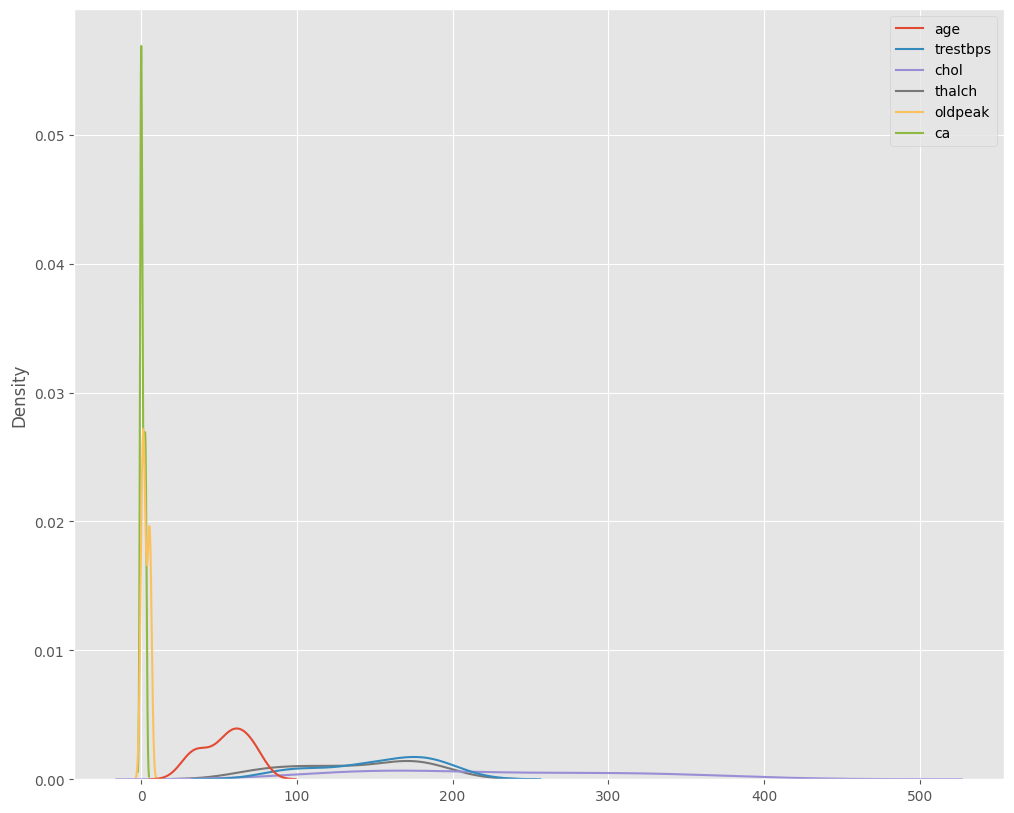

In [55]:
fig, ax = plt.subplots(figsize=(12,10))
sns.kdeplot(df_heart[numeric_col].iloc[:, :-1]);


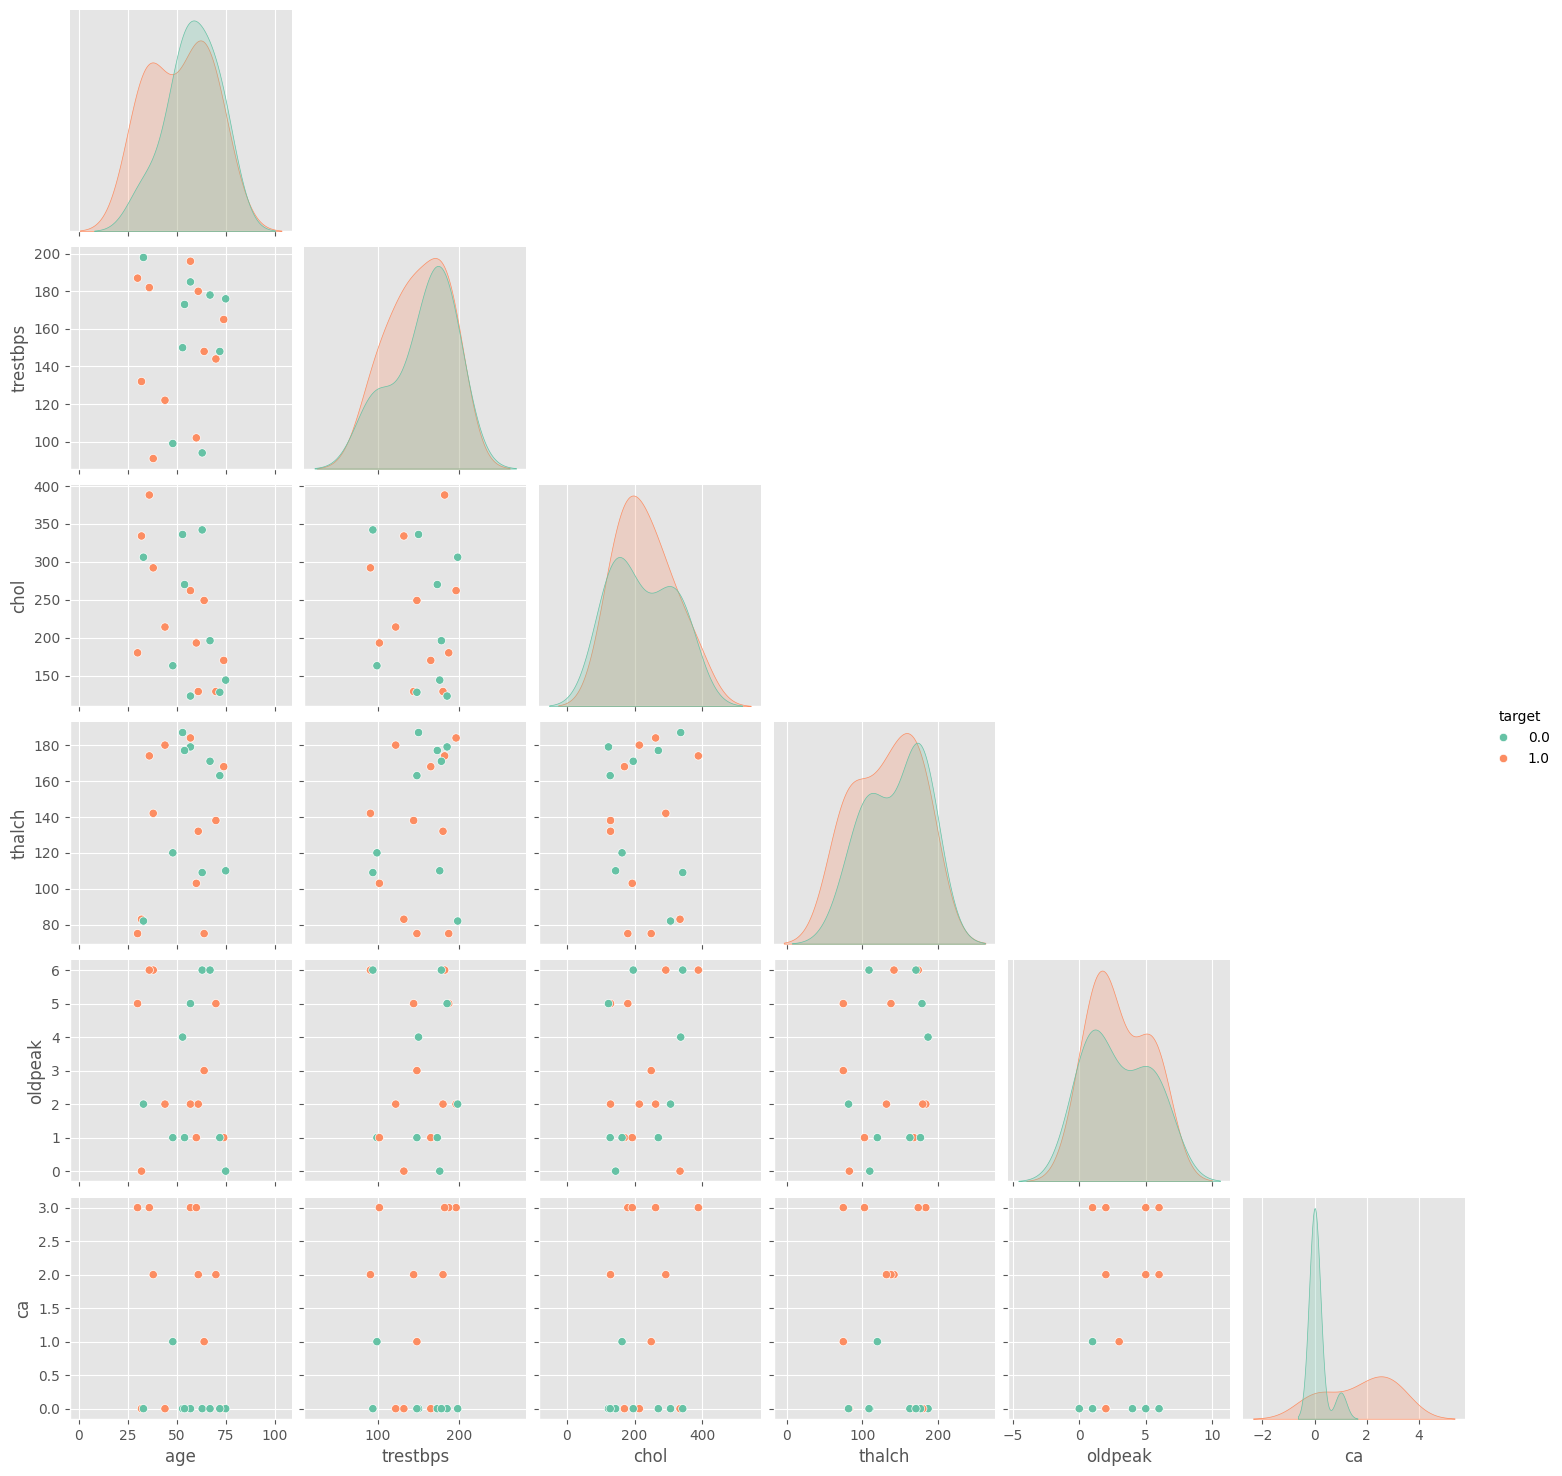

In [56]:
sns.pairplot(df_heart[numeric_col], hue='target', palette='Set2', diag_kind='kde', corner=True);


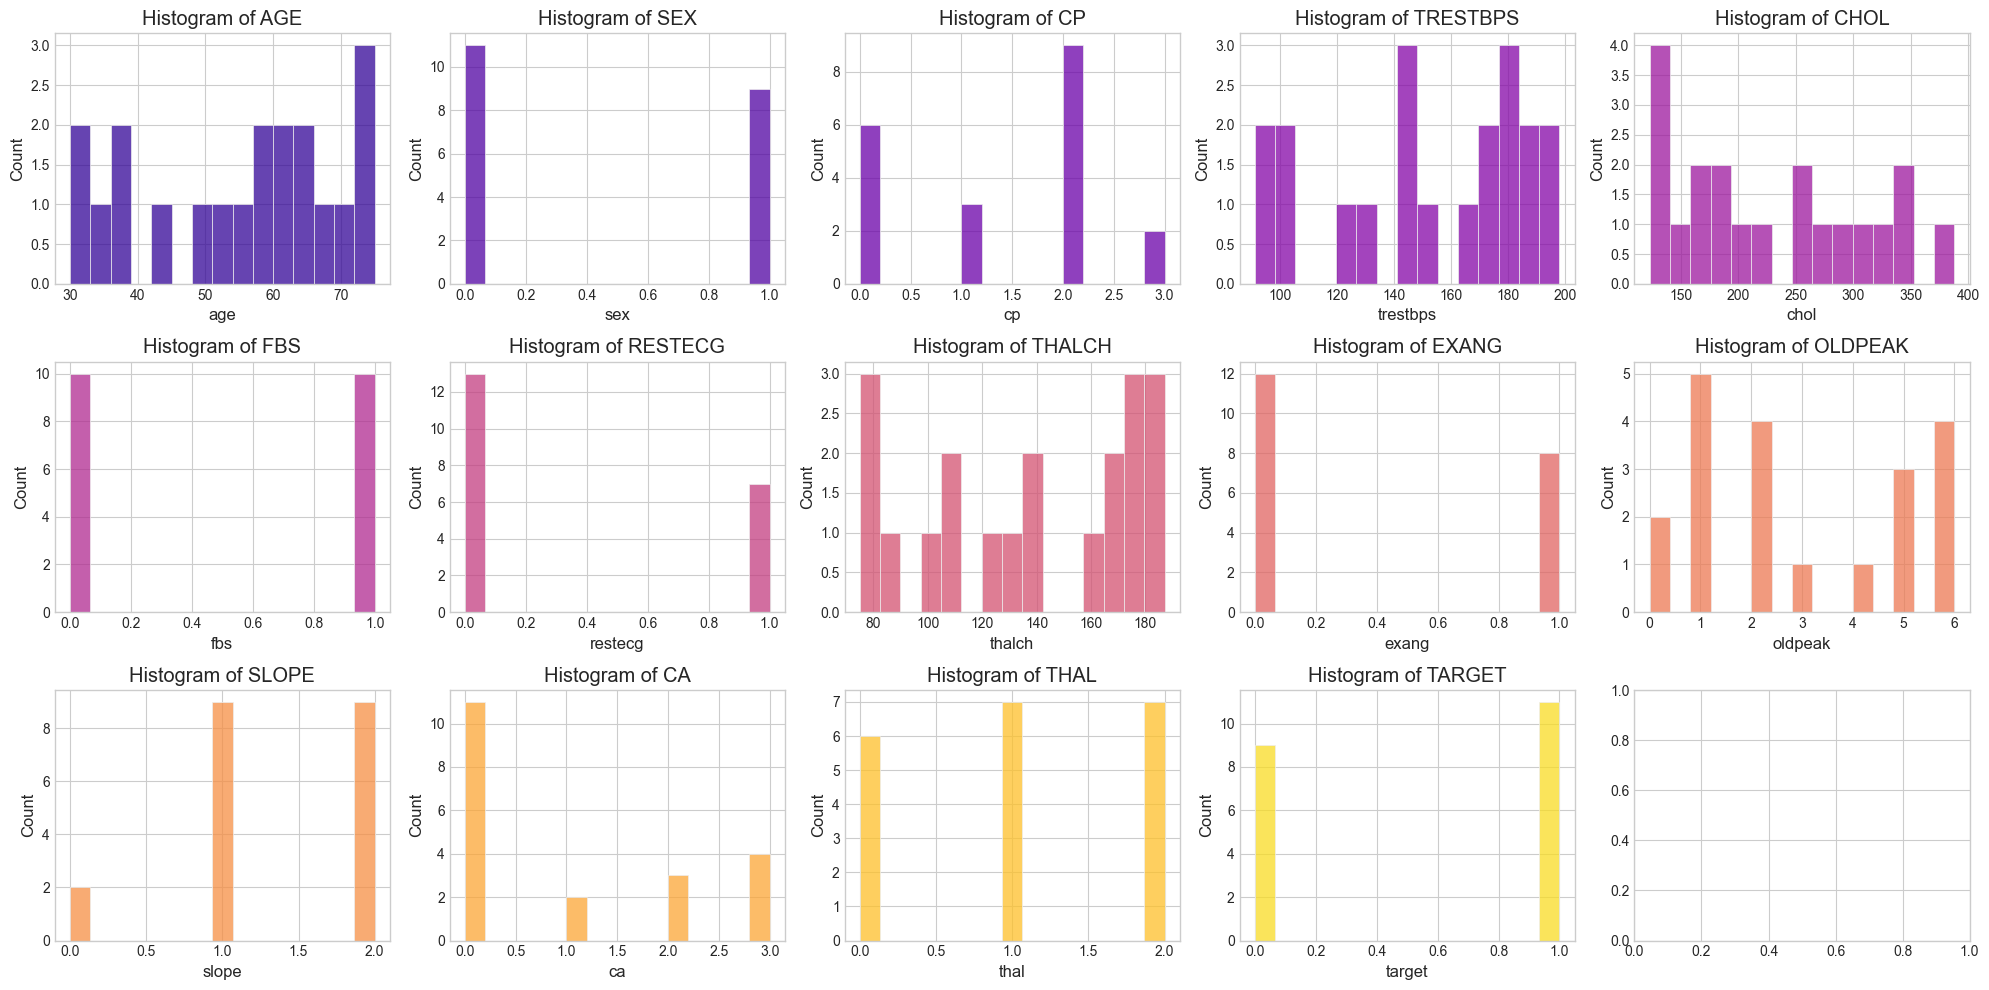

In [57]:
plt.style.use('seaborn-v0_8-whitegrid')
vibrant_palette = sns.color_palette("plasma", len(df_heart.columns))

fig, axes = plt.subplots(3, 5, figsize=(20, 10))
axes = axes.flatten()

for i, col in enumerate(df_heart.columns):
    sns.histplot(data=df_heart[col], ax=axes[i], bins=15,  color=vibrant_palette[i % len(vibrant_palette)])
    axes[i].set_title(f"Histogram of {col.upper()}")

plt.tight_layout()

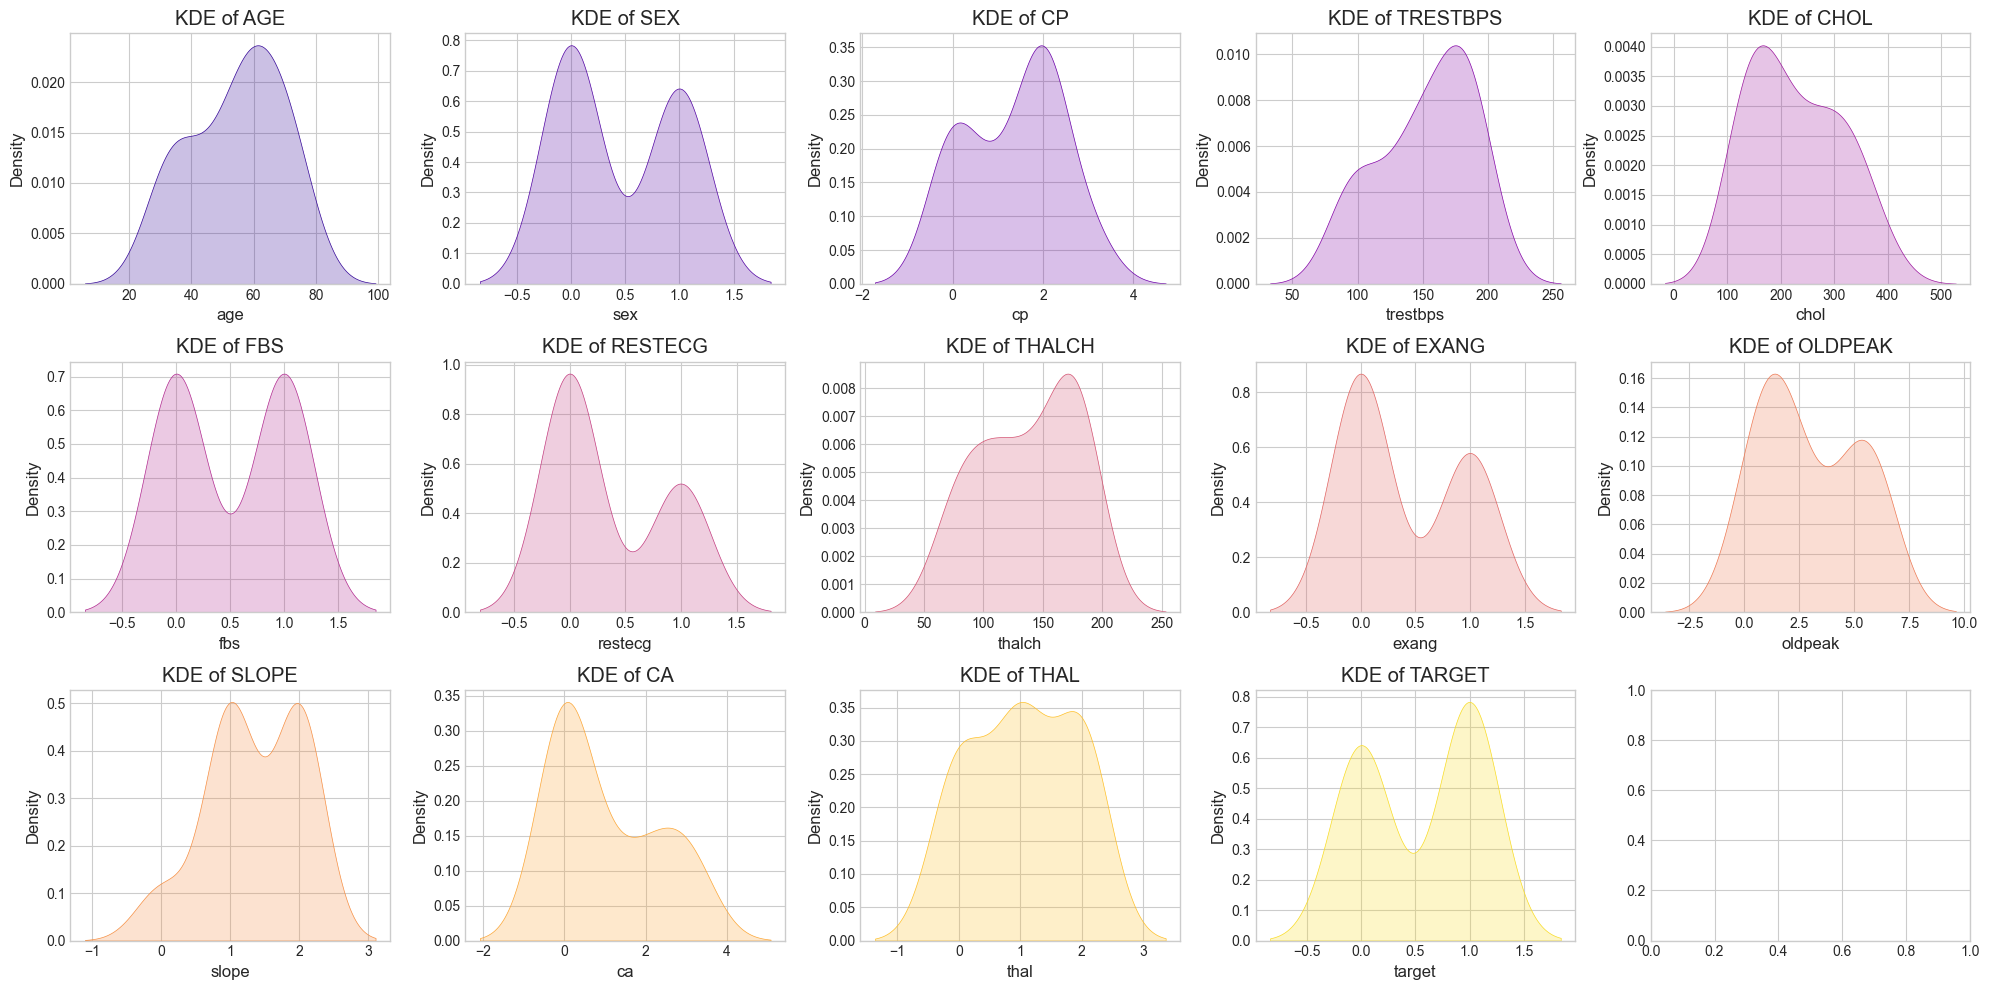

In [58]:
vibrant_palette = sns.color_palette("plasma", len(df_heart.columns))

fig, axes = plt.subplots(3, 5, figsize=(20, 10))
axes = axes.flatten()

for i, col in enumerate(df_heart.columns):
    sns.kdeplot(data=df_heart[col], ax=axes[i], color=vibrant_palette[i % len(vibrant_palette)], fill=True)
    axes[i].set_title(f"KDE of {col.upper()}")
plt.tight_layout()

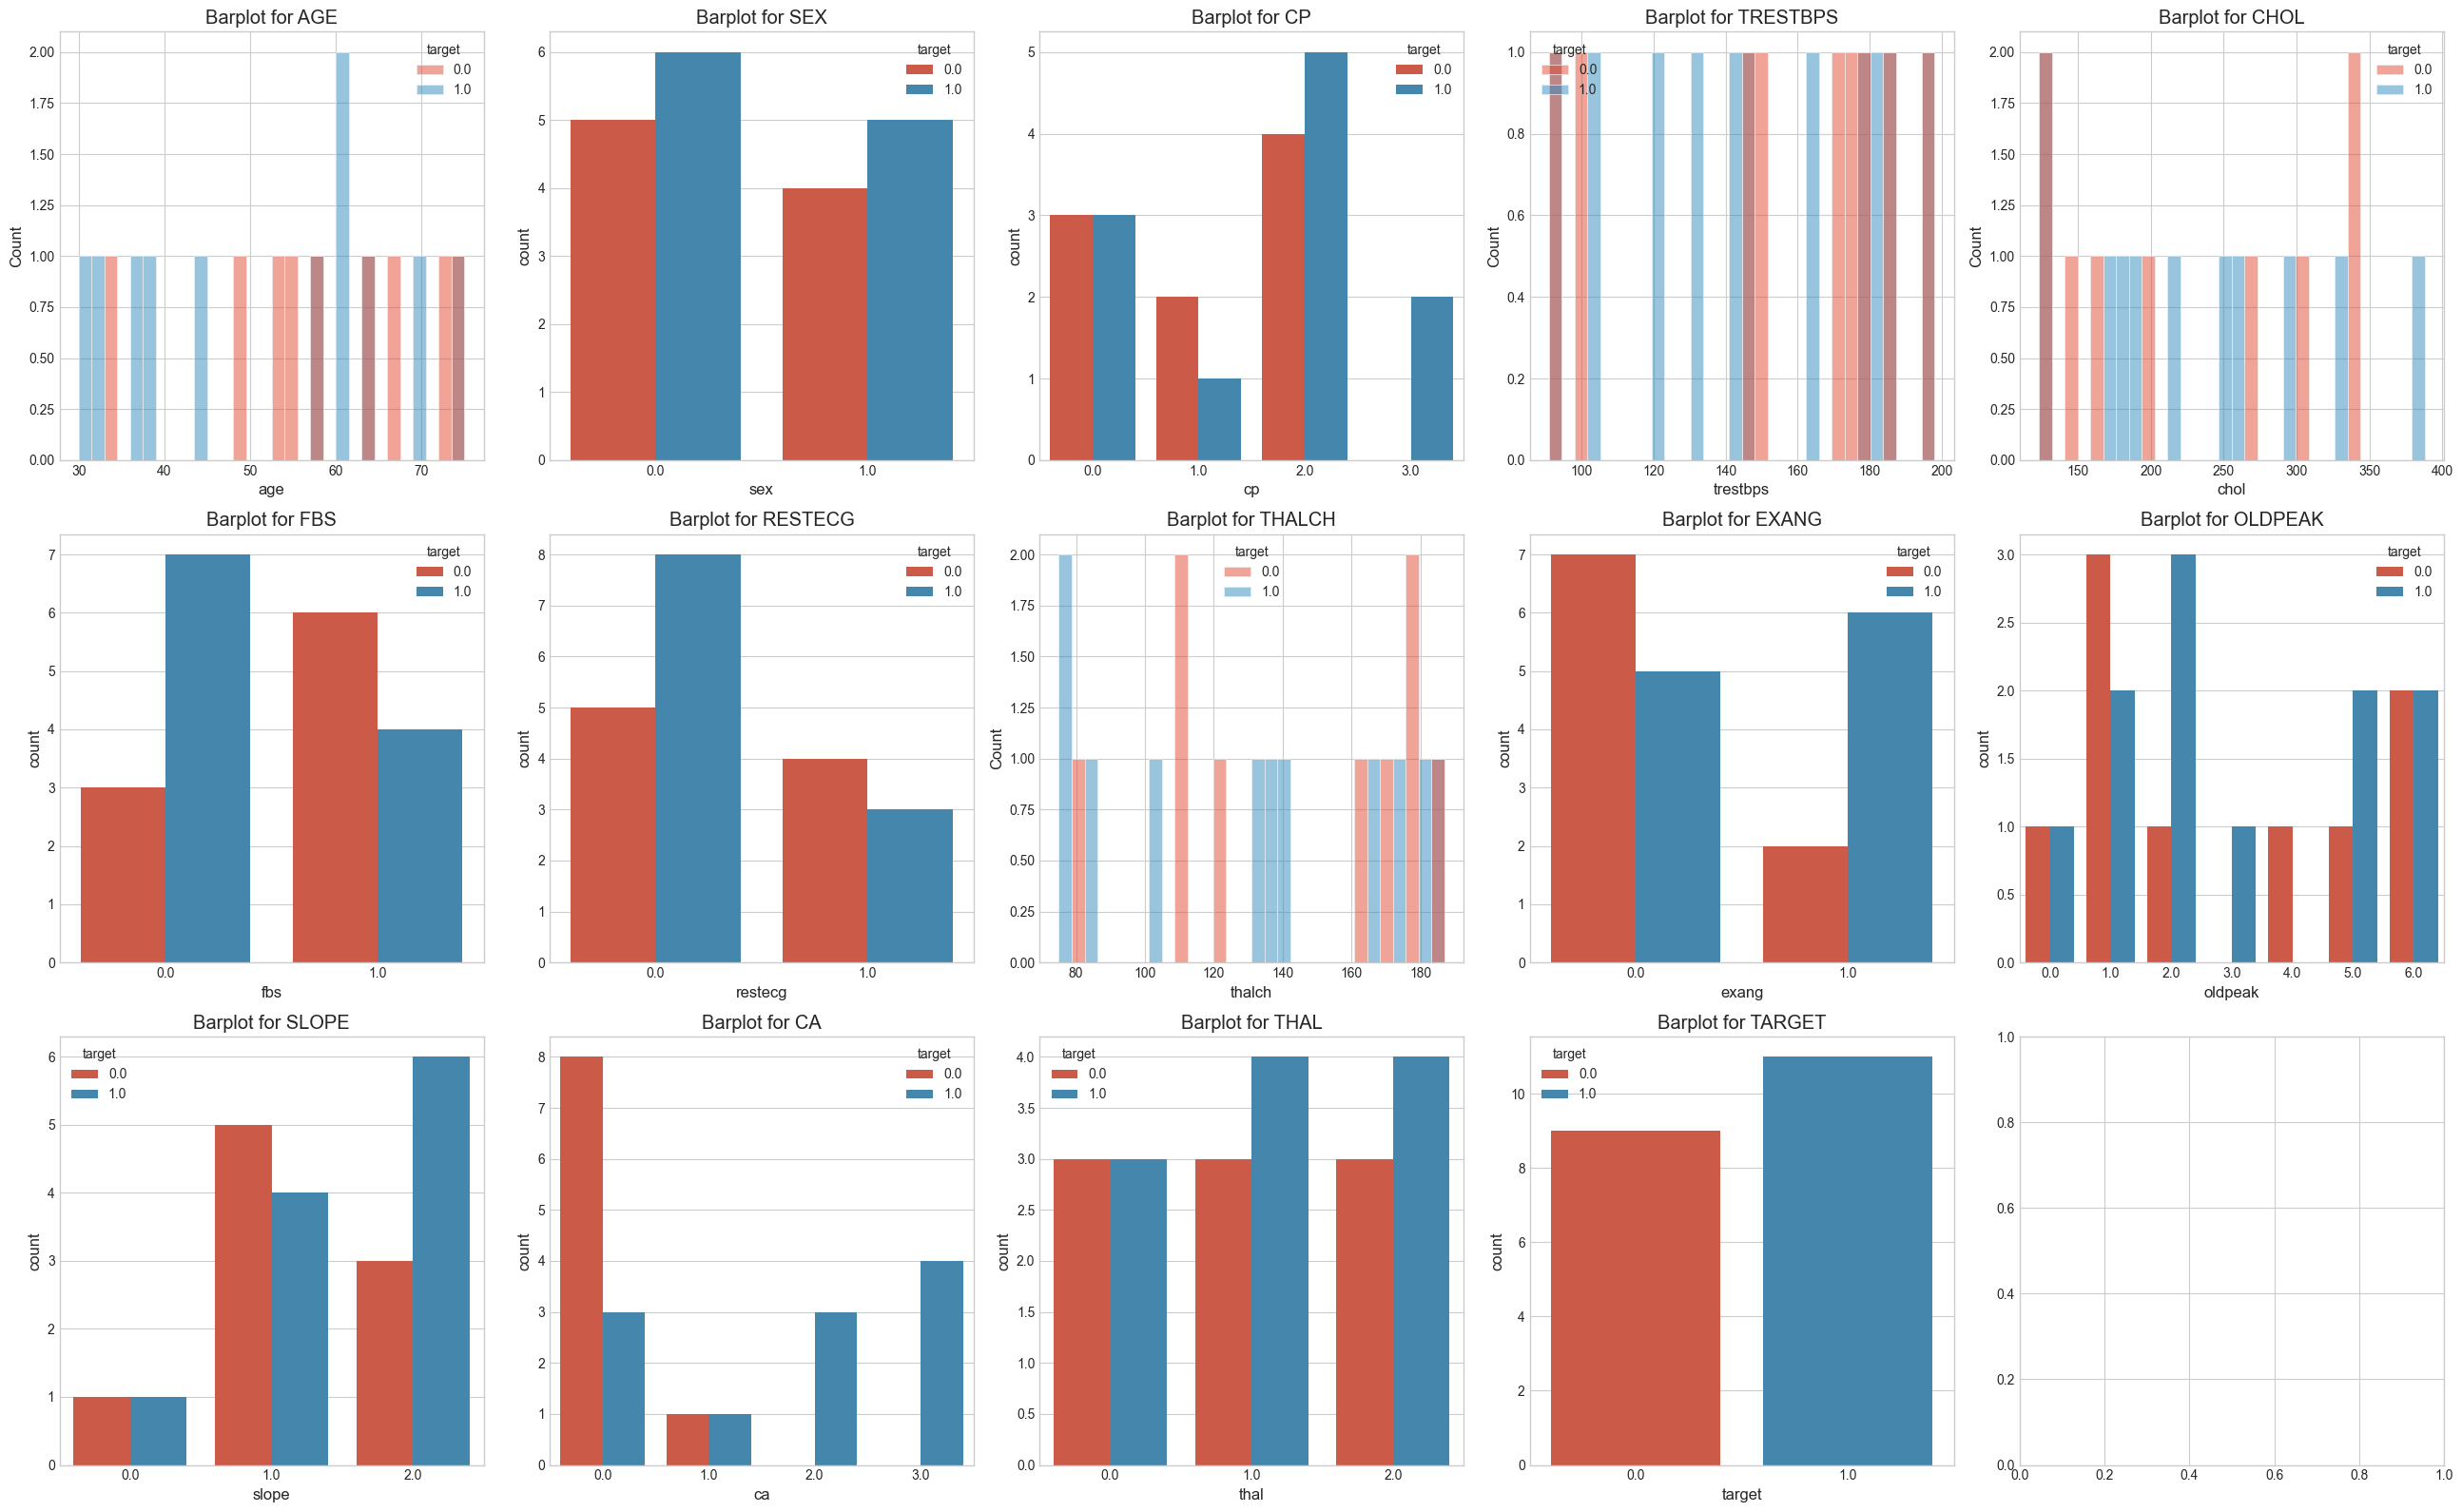

In [59]:
fig, axes = plt.subplots(figsize=(26, 16), nrows=3, ncols=5)
axes = axes.flatten()

# Tạo biểu đồ barplot cho từng cột
for i, col in enumerate(df_heart.columns):
    ax = axes[i]
    if col in df_heart[['age',	'trestbps',	'chol',	'thalch']]:
        # Với các cột phân loại, đếm số lượng từng giá trị
        sns.histplot(data=df_heart, x=col, hue='target', ax=ax, bins=30)
    else:
        # Với các cột số, vẽ biểu đồ phân bố trung bình theo trạng thái satisfaction
        sns.countplot(data=df_heart, x=col, hue='target', ax=ax)
    ax.set_title(f'Barplot for {col.upper()}')

plt.tight_layout()
plt.show();

In [60]:
# Kiem tra do lech va nhon 
for col in df_heart[numeric_col].columns[:-1]:
    skew = df_heart[col].skew()
    kurt = df_heart[col].kurt()
    print(f'Do lech va nhon cua {col.upper()} la luot la: {skew}, {kurt}')


Do lech va nhon cua AGE la luot la: -0.33450783139331675, -1.135038781659592
Do lech va nhon cua TRESTBPS la luot la: -0.549561241802993, -1.0128589875661524
Do lech va nhon cua CHOL la luot la: 0.3689807411119265, -1.1738467697991912
Do lech va nhon cua THALCH la luot la: -0.32200924154464544, -1.4555557613431698
Do lech va nhon cua OLDPEAK la luot la: 0.2716241896427304, -1.5613532394398846
Do lech va nhon cua CA la luot la: 0.7073977117815302, -1.2790849673202613


## Logictis Regression

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, classification_report
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA
from joblib import load
# from statsmodels.formula.api import ols
# from scipy.stats import shapiro, bartlett
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# from sklearn.feature_selection import f_regression


In [62]:
# Chia tap du lieu
X_test = df_heart.drop(columns=['target'], errors='ignore')
y_test = df_heart['target']


scaler = load('scaler.pkl')
X_test_scaled = scaler.transform(X_test)

In [63]:
pca = load('pca.pkl')
X_test_pca = pca.transform(X_test_scaled)

# Loại bỏ thành phần thứ 4
X_pca_test_reduced = np.delete(X_test_pca, 3, axis=1)

In [64]:
model_sklearn = load('LogisticRegression.pkl')
y_pred = model_sklearn.predict(X_pca_test_reduced)

print('Predictions:\n', y_pred)

Predictions:
 [1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0.]


In [65]:
# Nếu tập test có cột target, bạn có thể đánh giá
if 'target' in df_heart.columns:
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7
Classification Report:
               precision    recall  f1-score   support

         0.0       0.67      0.67      0.67         9
         1.0       0.73      0.73      0.73        11

    accuracy                           0.70        20
   macro avg       0.70      0.70      0.70        20
weighted avg       0.70      0.70      0.70        20



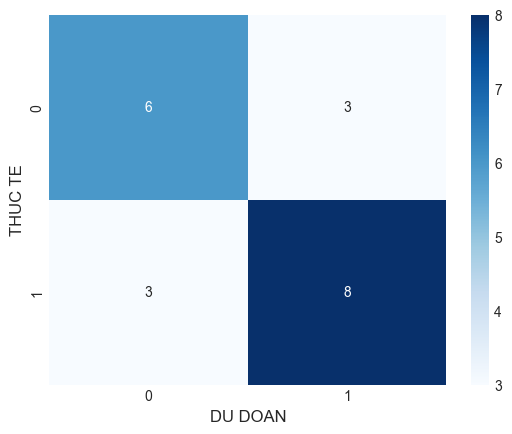

In [66]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')
plt.xlabel('DU DOAN')
plt.ylabel('THUC TE');